In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt

In [345]:
#train = pd.read_csv('final_data_train.csv', sep=',')
train = pd.read_csv('final_data_down.csv', sep=',')
#train = pd.read_csv('final_data_down_up.csv', sep=',')
train['LITHOLOGY'] = train['LITHOLOGY'].map({'Shale':0, 'Sandstone':1, 'Sandstone/Shale':2, 'Limestone':3,'Chalk':4,'Marl':5,'Tuff':6,'Coal':7,'Dolomite':8,'Anhydrite':9})
train.head()

,Unnamed: 0,DEPTH_MD,X_LOC,Y_LOC,GR,CALI,RSHA,RMED,RDEP,RHOB,GR.1,SP,ROP,DRHO,VSH,LITHOLOGY
0,22930,2421.525998,438597.15625,6478965.5,28.505007,12.235104,1.148616,0.622600,0.478619,2.211060,28.505007,28.844028,12.292023,-0.015580,0.076343,1
1,37124,2151.081604,449956.75000,6500267.5,26.152063,12.211001,0.399445,0.410381,0.449000,2.227212,26.152063,155.358032,2.601168,-0.018239,0.039826,1
2,24808,2719.293998,438596.87500,6478968.0,34.787781,8.359400,3.835066,3.207000,4.169867,2.340956,34.787781,24.665014,7.715092,-0.018766,0.101946,1
3,75547,1688.496200,501140.12500,6608183.0,50.169529,12.389871,0.511286,0.563613,0.657478,2.079371,50.169529,53.111412,11.554600,-0.015048,0.083088,1
4,73589,4771.224000,454985.53125,6570991.5,13.293411,11.653574,20.826494,12.532799,5.387705,2.608279,13.293411,103.426620,3.186400,-0.002661,0.014401,1


In [346]:
test = pd.read_csv('final_data_test.csv', sep=',')
test['LITHOLOGY'] = test['LITHOLOGY'].map({'Shale':0, 'Sandstone':1, 'Sandstone/Shale':2, 'Limestone':3,'Chalk':4,'Marl':5,'Tuff':6,'Coal':7,'Dolomite':8,'Anhydrite':9})
test.head()

,Unnamed: 0,DEPTH_MD,X_LOC,Y_LOC,GR,CALI,RSHA,RMED,RDEP,RHOB,GR.1,SP,ROP,DRHO,VSH,LITHOLOGY
0,38253,2330.593604,449956.78125,6500264.0,53.138084,13.298260,0.906833,0.760894,1.388421,2.366196,53.138084,138.597351,9.896684,0.029395,0.110738,5
1,844,2733.032000,437613.15625,6470983.0,58.675007,10.656514,1.381382,2.066215,2.187420,2.308287,58.675007,106.777107,2.996608,0.125918,0.128050,0
2,23379,2491.445998,438596.96875,6478966.5,9.184490,12.367321,5.445554,3.351520,2.706583,2.524490,9.184490,38.725040,3.682523,0.003649,0.009677,3
3,5427,1751.416000,436811.96875,6462996.5,61.107655,15.747392,0.781854,0.781854,0.737634,2.026439,61.107655,69.066994,73.956955,0.104872,0.142847,0
4,24404,2651.653998,438596.34375,6478968.0,16.182766,9.453100,10.762029,6.286816,6.454775,2.486488,16.182766,49.199100,3.134075,-0.015713,0.031965,3


# OTHER

In [347]:
#train = pd.read_csv('final_data_train_other.csv', sep=',')
#train['LITHOLOGY'] = train['LITHOLOGY'].map({'Shale':0, 'Sandstone':1, 'Sandstone/Shale':2, 'Limestone':3,'Marl':4,'Chalk':5,'Other':6})
#train.head()

In [348]:
#test = pd.read_csv('final_data_test_other.csv', sep=',')
#test['LITHOLOGY'] = test['LITHOLOGY'].map({'Shale':0, 'Sandstone':1, 'Sandstone/Shale':2, 'Limestone':3,'Marl':4,'Chalk':5,'Other':6})
#test.head()

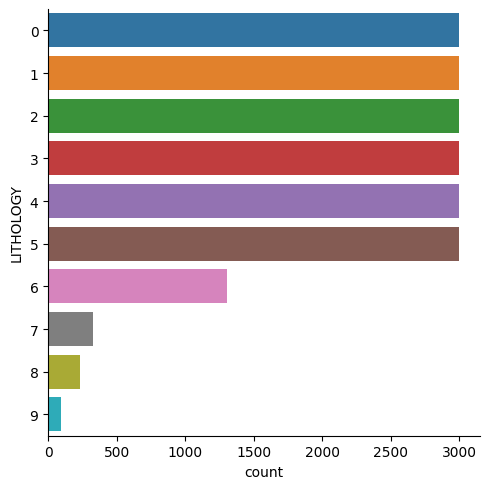

In [349]:
sns.catplot(y = "LITHOLOGY", data = train, kind = "count")

In [572]:
x_train = train[['DEPTH_MD','X_LOC','Y_LOC','GR','VSH']]
#x_train = train[['DEPTH_MD','X_LOC','Y_LOC','GR','CALI','RSHA','RMED','RDEP','RHOB','SP','ROP','DRHO','VSH']]
y_train = train['LITHOLOGY']

In [573]:
x_test = test[['DEPTH_MD','X_LOC','Y_LOC','GR','VSH']]
#x_test = test[['DEPTH_MD','X_LOC','Y_LOC','GR','CALI','RSHA','RMED','RDEP','RHOB','SP','ROP','DRHO','VSH']]
y_test = test['LITHOLOGY']

In [574]:
#from sklearn.preprocessing import StandardScaler

##sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

# Model

In [556]:
from sklearn.metrics import classification_report, confusion_matrix

# Support Vector Machine

In [520]:
from sklearn.svm import SVC
model=SVC()

In [521]:
model.fit(x_train, y_train)

SVC()

In [522]:
y_pred=model.predict(x_test)

In [523]:
print(confusion_matrix(y_test,y_pred))

[[   0 2239    0  314 7998    0    0    0    0    0]
 [   0  635    0  554 1572    0    0    0    0    0]
 [   0  164    0   68  907    0    0    0    0    0]
 [   0  368    0  192  991    0    0    0    0    0]
 [   0    0    0    0 1014    0    0    0    0    0]
 [   0  105    0  115  548    0    0    0    0    0]
 [   0   41    0    0  280    0    0    0    0    0]
 [   0   61    0   19    0    0    0    0    0    0]
 [   0    2    0   10   54    0    0    0    0    0]
 [   0    0    0    0   19    0    0    0    0    0]]


In [524]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10551
           1       0.18      0.23      0.20      2761
           2       0.00      0.00      0.00      1139
           3       0.15      0.12      0.14      1551
           4       0.08      1.00      0.14      1014
           5       0.00      0.00      0.00       768
           6       0.00      0.00      0.00       321
           7       0.00      0.00      0.00        80
           8       0.00      0.00      0.00        66
           9       0.00      0.00      0.00        19

    accuracy                           0.10     18270
   macro avg       0.04      0.14      0.05     18270
weighted avg       0.04      0.10      0.05     18270



c:\Users\Samuel Brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Samuel Brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Samuel Brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [525]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv('classificacion_report.csv')

c:\Users\Samuel Brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Samuel Brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Samuel Brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

[[   0 2239    0  314 7998    0    0    0    0    0]
 [   0  635    0  554 1572    0    0    0    0    0]
 [   0  164    0   68  907    0    0    0    0    0]
 [   0  368    0  192  991    0    0    0    0    0]
 [   0    0    0    0 1014    0    0    0    0    0]
 [   0  105    0  115  548    0    0    0    0    0]
 [   0   41    0    0  280    0    0    0    0    0]
 [   0   61    0   19    0    0    0    0    0    0]
 [   0    2    0   10   54    0    0    0    0    0]
 [   0    0    0    0   19    0    0    0    0    0]]


<Axes: >

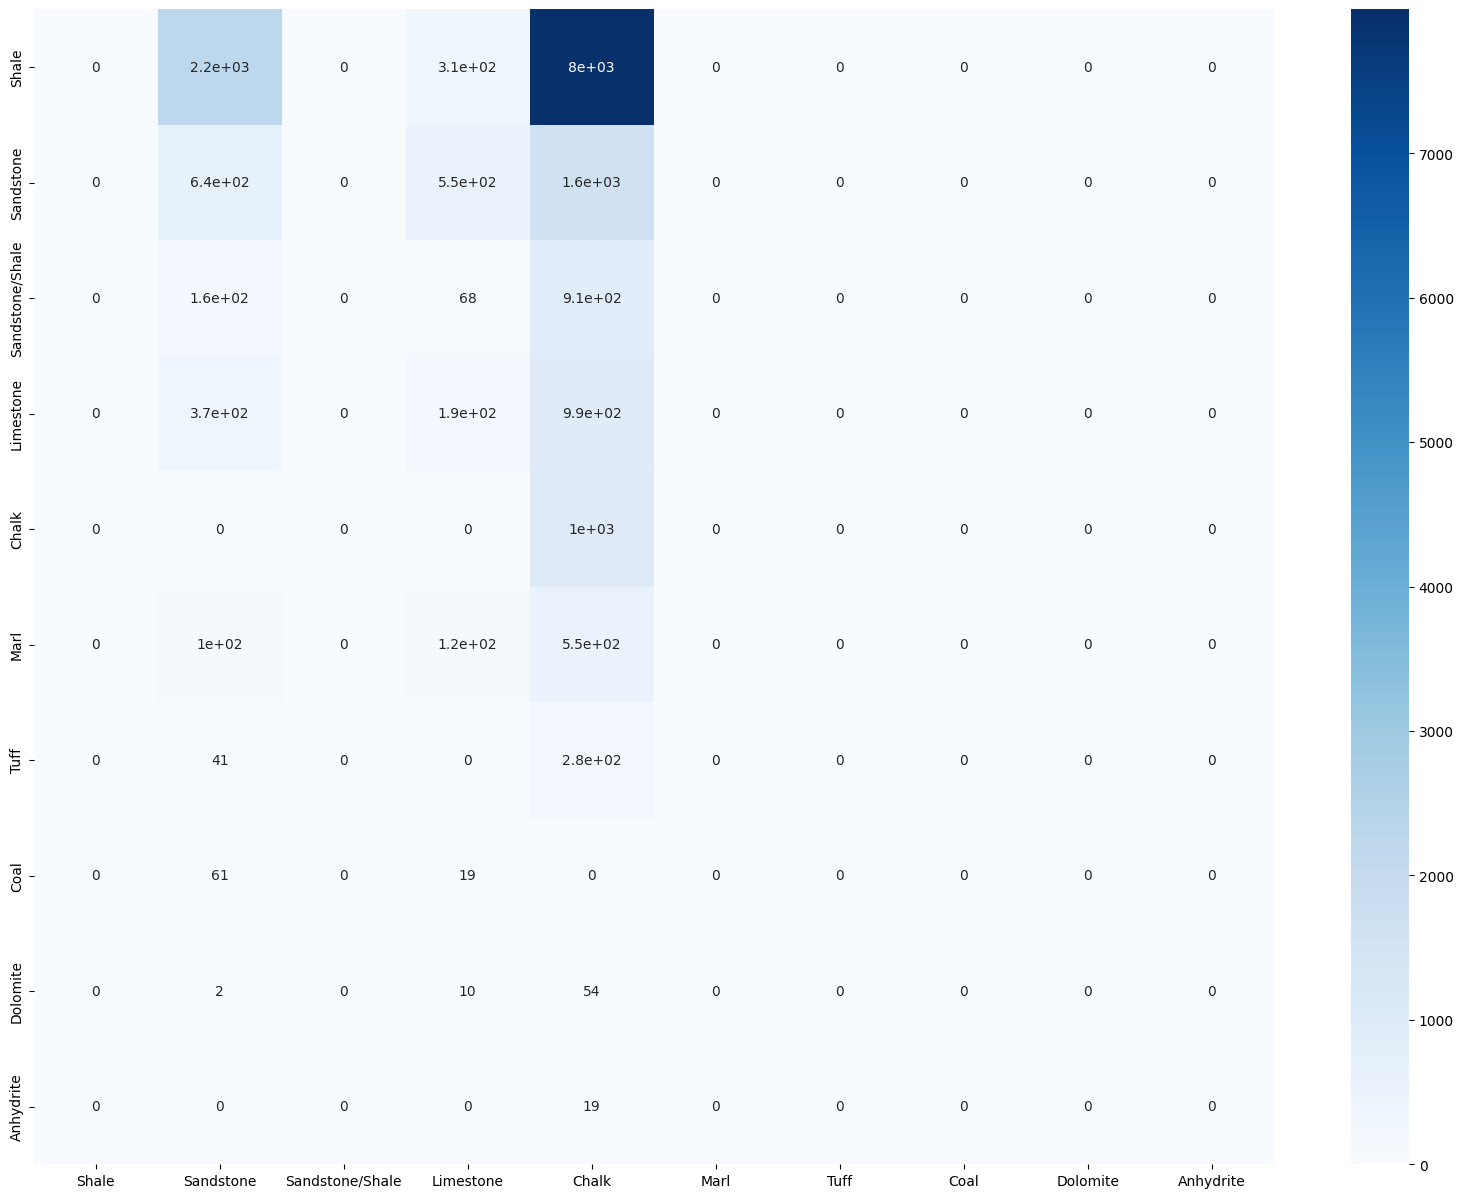

In [526]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

labels = ['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone','Chalk','Marl','Tuff','Coal','Dolomite','Anhydrite']
#labels = ['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone','Chalk','Marl','Other']
df_cm = pd.DataFrame(cf_matrix, index = labels,
                  columns = labels)
plt.figure(figsize = (20,15))
sns.heatmap(df_cm, annot=True, cmap='Blues')

# XGBOOST

In [575]:
from sklearn import svm
from xgboost import XGBClassifier
clf = XGBClassifier(booster = 'dart')
clf

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [576]:
clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [577]:
y_pred = clf.predict(x_test)

In [578]:
print(clf.feature_importances_)

[0.10114382 0.19658437 0.2933567  0.12486456 0.28405055]


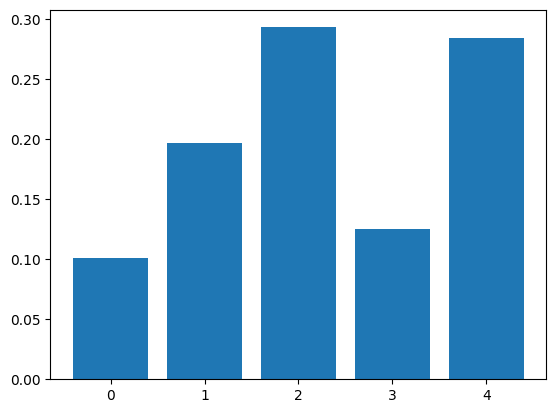

In [579]:
from matplotlib import pyplot
pyplot.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
pyplot.show()

In [580]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     10551
           1       0.90      0.92      0.91      2761
           2       0.63      0.92      0.75      1139
           3       0.83      0.89      0.86      1551
           4       0.95      0.98      0.97      1014
           5       0.82      0.95      0.88       768
           6       0.79      0.98      0.88       321
           7       0.49      0.91      0.64        80
           8       0.40      0.91      0.56        66
           9       0.95      0.95      0.95        19

    accuracy                           0.90     18270
   macro avg       0.77      0.93      0.83     18270
weighted avg       0.92      0.90      0.91     18270



In [581]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv('classificacion_report.csv')

<Axes: >

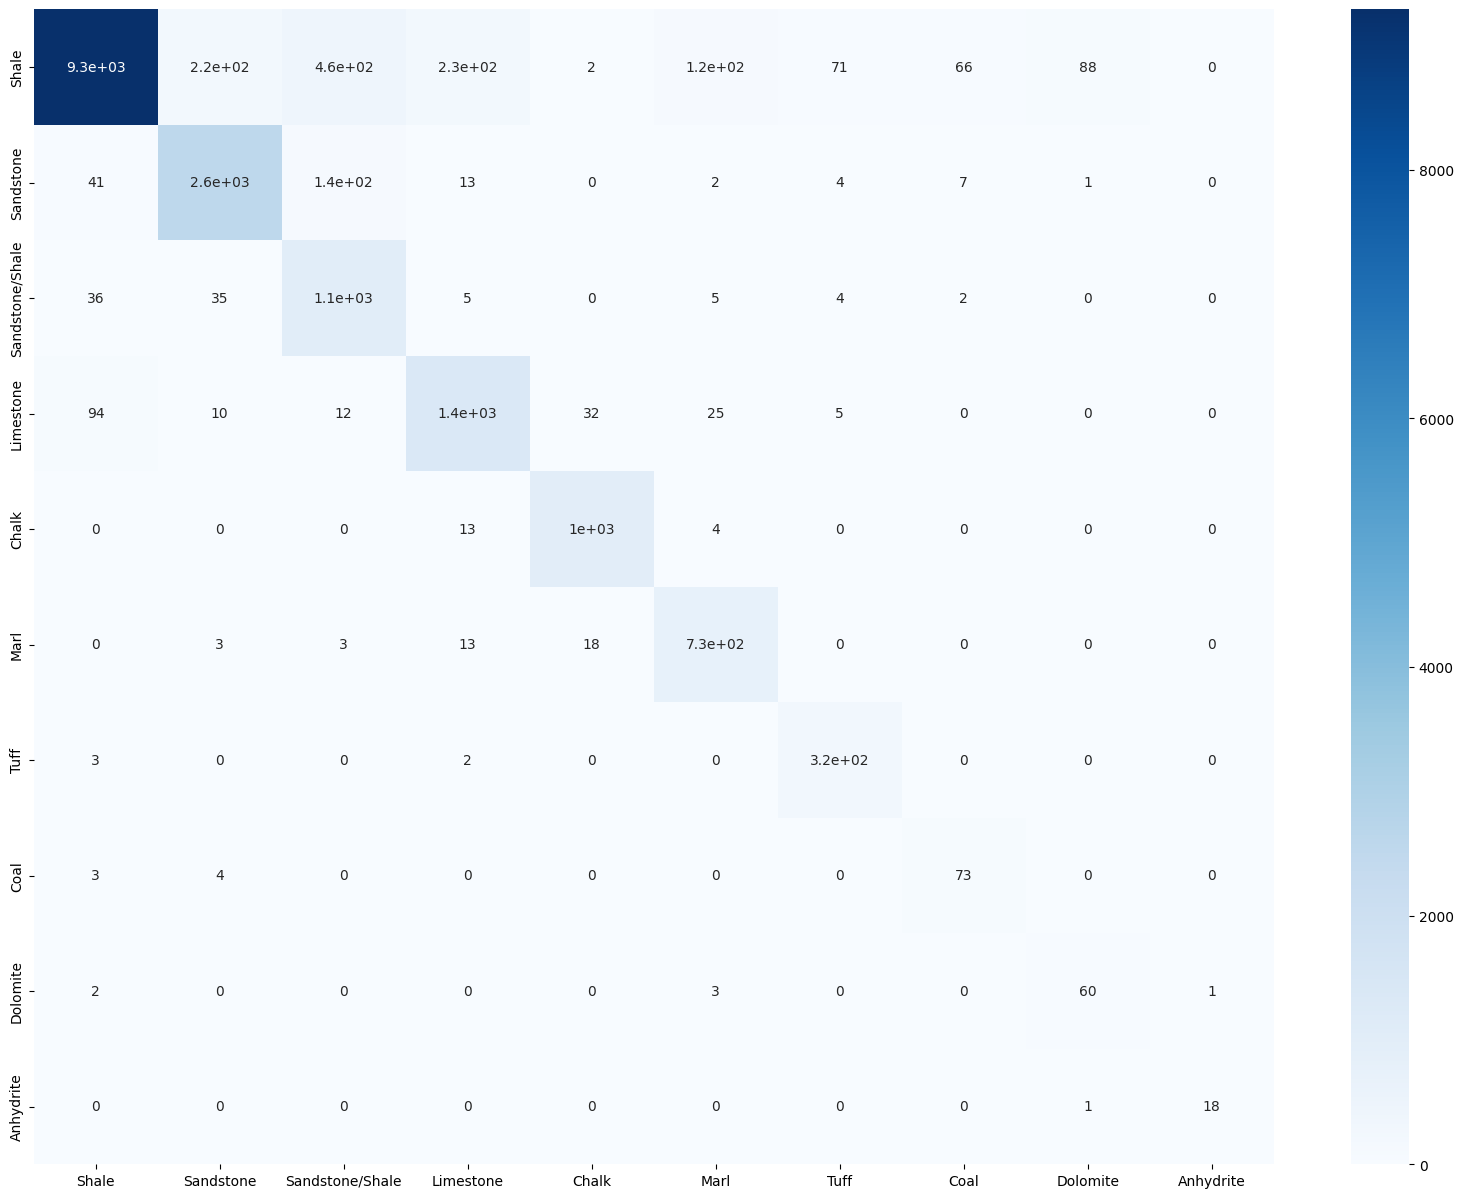

In [582]:

from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)

labels = ['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone','Chalk','Marl','Tuff','Coal','Dolomite','Anhydrite']
#labels = ['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone','Chalk','Marl','Other']
df_cm = pd.DataFrame(cf_matrix, index = labels,
                  columns = labels)
plt.figure(figsize = (20,15))
sns.heatmap(df_cm, annot=True, cmap='Blues')

# Decision Tree

In [465]:
# Creating Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

# Predict Accuracy Score
y_pred = clf.predict(x_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(x_train)))

Train data accuracy: 1.0


In [466]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90     10551
           1       0.88      0.89      0.89      2761
           2       0.58      0.88      0.70      1139
           3       0.68      0.90      0.78      1551
           4       0.96      0.97      0.96      1014
           5       0.84      0.95      0.89       768
           6       0.76      0.97      0.85       321
           7       0.29      0.72      0.42        80
           8       0.32      0.82      0.46        66
           9       0.65      0.89      0.76        19

    accuracy                           0.86     18270
   macro avg       0.69      0.88      0.76     18270
weighted avg       0.90      0.86      0.87     18270



In [467]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv('classificacion_report.csv')

In [468]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[8764,  243,  563,  584,    0,   91,   86,  106,  107,    7],
       [  71, 2468,  165,   23,    0,    6,    4,   24,    0,    0],
       [  59,   58, 1008,    2,    0,    5,    3,    4,    0,    0],
       [  61,   13,    8, 1398,   29,   31,    4,    5,    2,    0],
       [   0,    0,    0,   27,  980,    7,    0,    0,    0,    0],
       [   4,    0,    4,   14,   12,  732,    0,    0,    2,    0],
       [   6,    0,    0,    3,    0,    0,  312,    0,    0,    0],
       [  11,    8,    3,    0,    0,    0,    0,   58,    0,    0],
       [   6,    0,    1,    0,    0,    3,    0,    0,   54,    2],
       [   0,    0,    0,    0,    0,    0,    0,    0,    2,   17]],
      dtype=int64)

<Axes: >

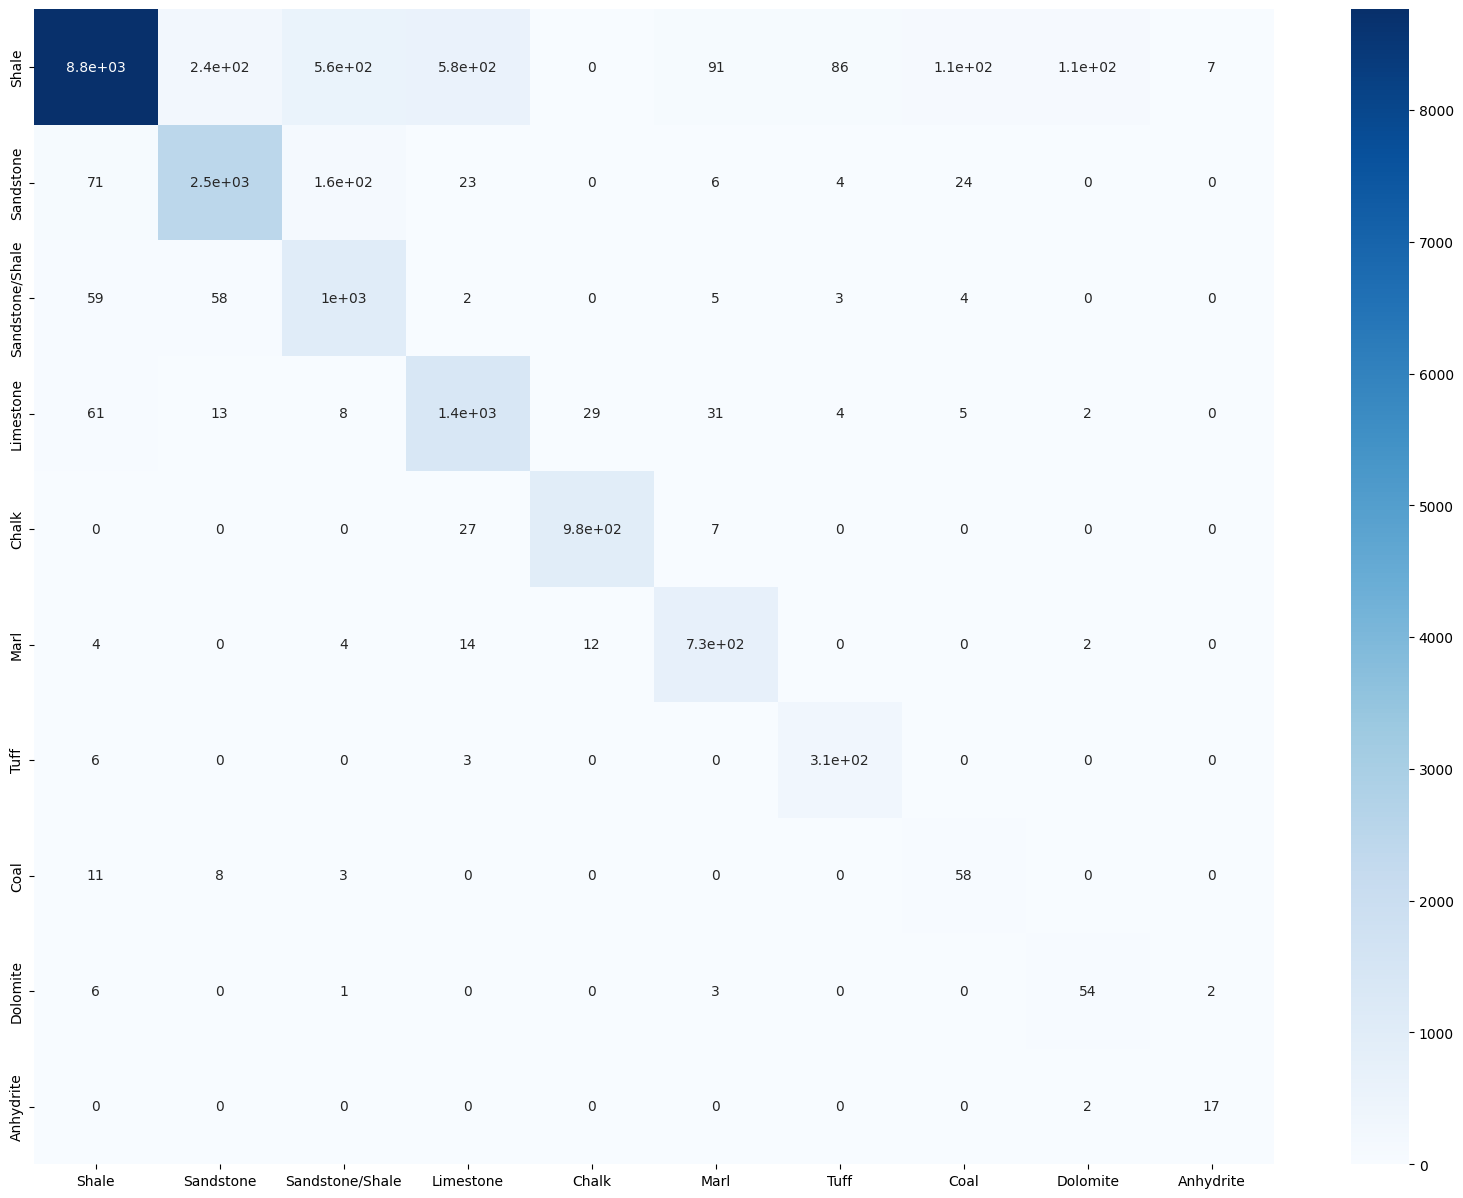

In [469]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)

labels = ['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone','Chalk','Marl','Tuff','Coal','Dolomite','Anhydrite']
#labels = ['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone','Chalk','Marl','Other']
df_cm = pd.DataFrame(cf_matrix, index = labels,
                  columns = labels)
plt.figure(figsize = (20,15))
sns.heatmap(df_cm, annot=True, cmap='Blues')

# Random Forest

In [470]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)

In [471]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8871373836891078


In [472]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92     10551
           1       0.90      0.92      0.91      2761
           2       0.61      0.92      0.74      1139
           3       0.79      0.89      0.84      1551
           4       0.94      0.98      0.96      1014
           5       0.80      0.95      0.87       768
           6       0.76      0.98      0.85       321
           7       0.34      0.78      0.47        80
           8       0.28      0.70      0.40        66
           9       0.75      0.95      0.84        19

    accuracy                           0.89     18270
   macro avg       0.71      0.89      0.78     18270
weighted avg       0.91      0.89      0.89     18270



In [473]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv('classificacion_report.csv')

<Axes: >

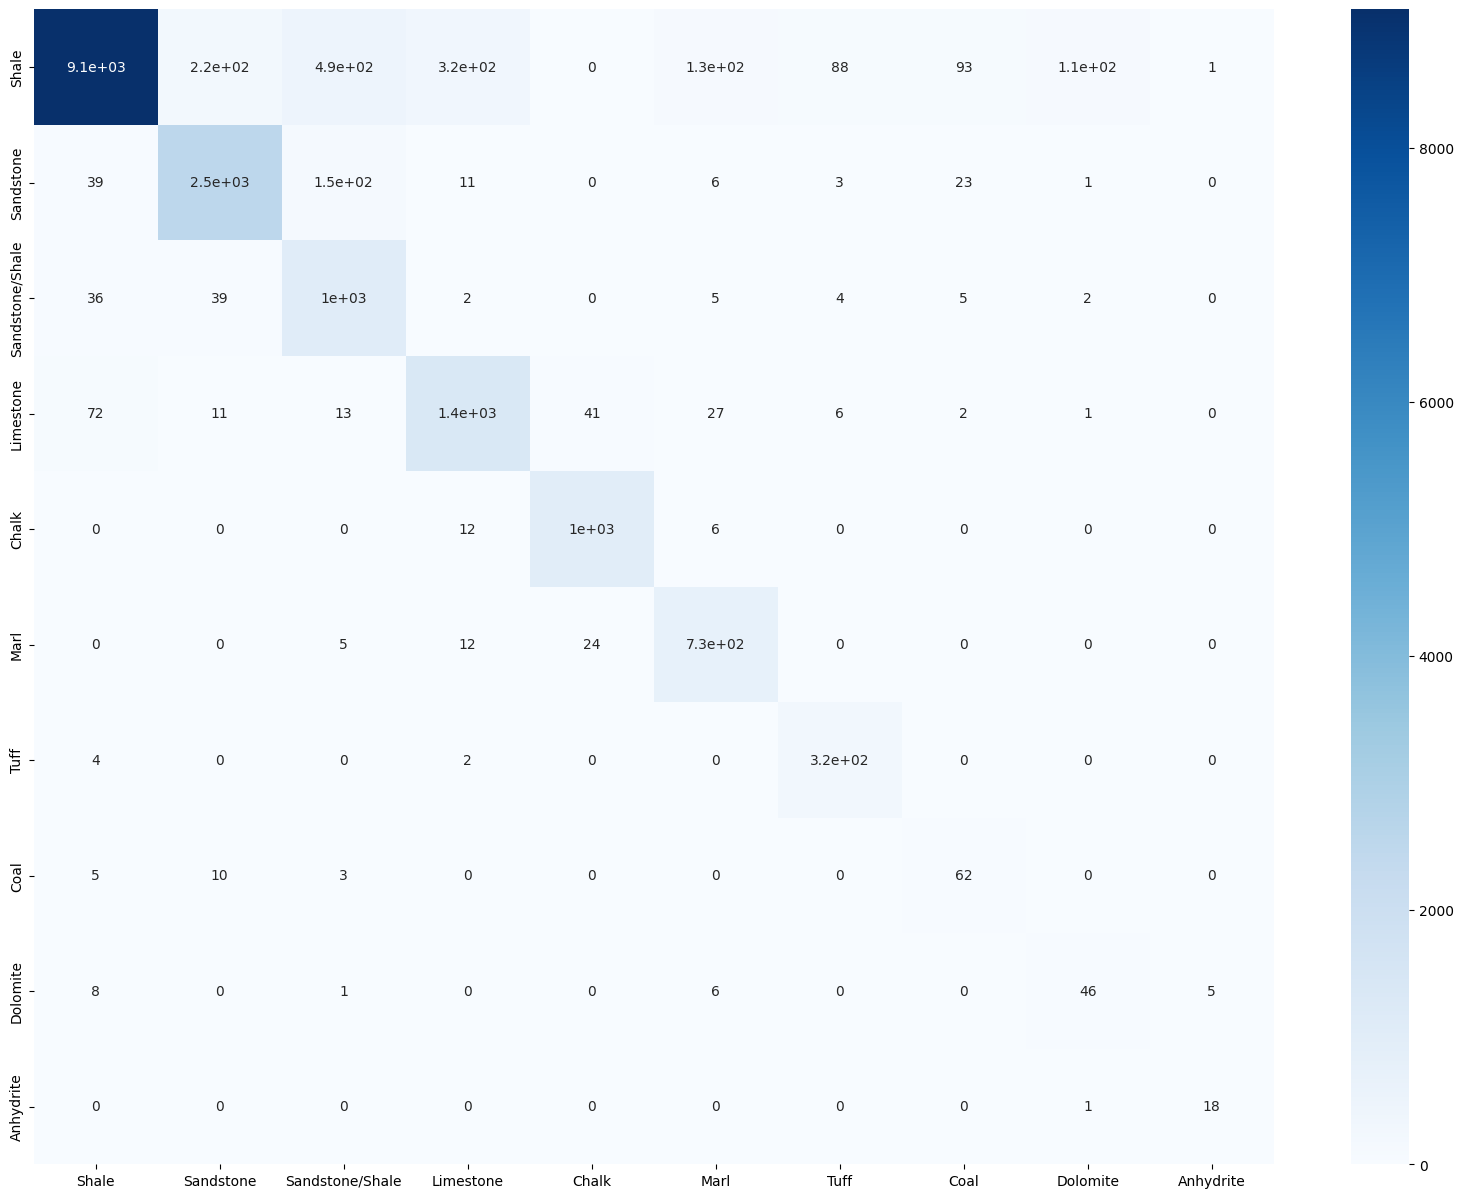

In [474]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)

labels = ['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone','Chalk','Marl','Tuff','Coal','Dolomite','Anhydrite']
#labels = ['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone','Chalk','Marl','Other']
df_cm = pd.DataFrame(cf_matrix, index = labels,
                  columns = labels)
plt.figure(figsize = (20,15))
sns.heatmap(df_cm, annot=True, cmap='Blues')

# KNN

In [475]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=5)

# Fitting the model
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [476]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88     10551
           1       0.86      0.88      0.87      2761
           2       0.50      0.84      0.63      1139
           3       0.78      0.79      0.79      1551
           4       0.91      0.95      0.93      1014
           5       0.64      0.88      0.74       768
           6       0.52      0.96      0.68       321
           7       0.16      0.51      0.25        80
           8       0.22      0.58      0.32        66
           9       0.78      0.95      0.86        19

    accuracy                           0.83     18270
   macro avg       0.64      0.82      0.69     18270
weighted avg       0.88      0.83      0.85     18270



In [477]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv('classificacion_report.csv')

<Axes: >

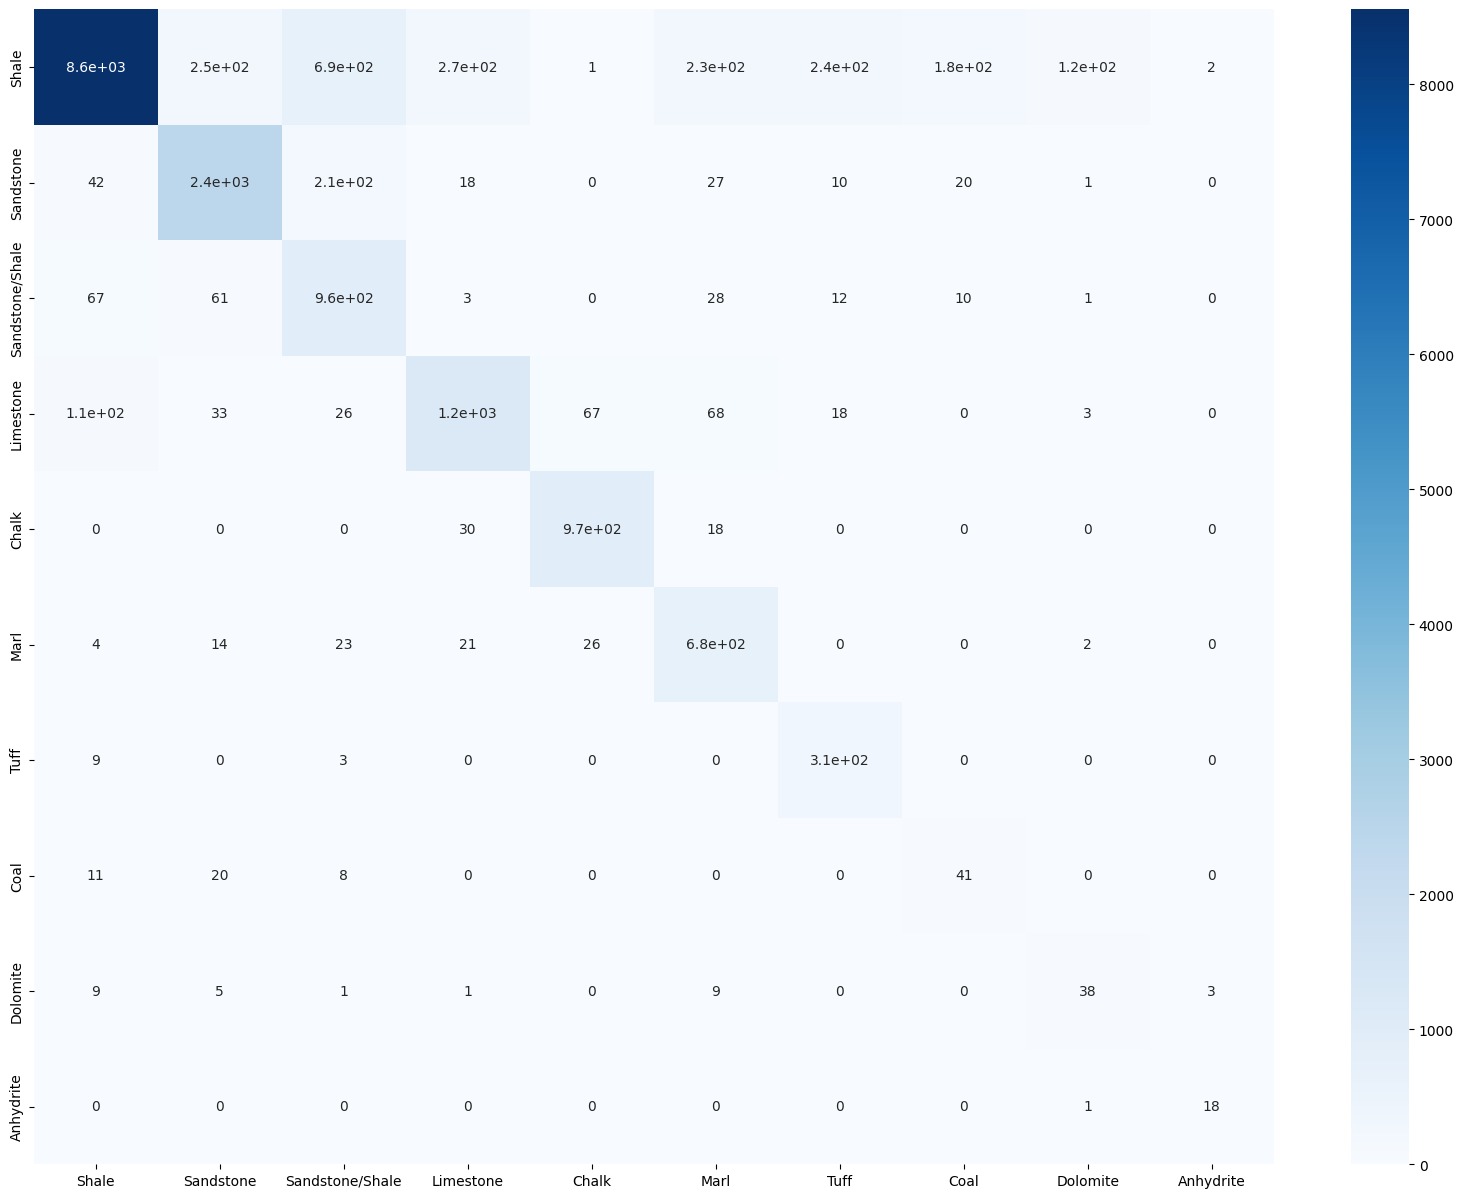

In [478]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)

labels = ['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone','Chalk','Marl','Tuff','Coal','Dolomite','Anhydrite']
#labels = ['Shale', 'Sandstone', 'Sandstone/Shale', 'Limestone','Chalk','Marl','Other']
df_cm = pd.DataFrame(cf_matrix, index = labels,
                  columns = labels)
plt.figure(figsize = (20,15))
sns.heatmap(df_cm, annot=True, cmap='Blues')

# PCA

In [431]:
from sklearn.decomposition import PCA

#pca = PCA()
pca = PCA(n_components=7)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [432]:
explained_variance = pca.explained_variance_ratio_

In [433]:
explained_variance

array([0.20469404, 0.16057349, 0.11821576, 0.10677024, 0.08328724,
       0.0683264 , 0.06595587])

In [435]:
indice = [0, 1,2,3,4,5,6]
indice

[0, 1, 2, 3, 4, 5, 6]

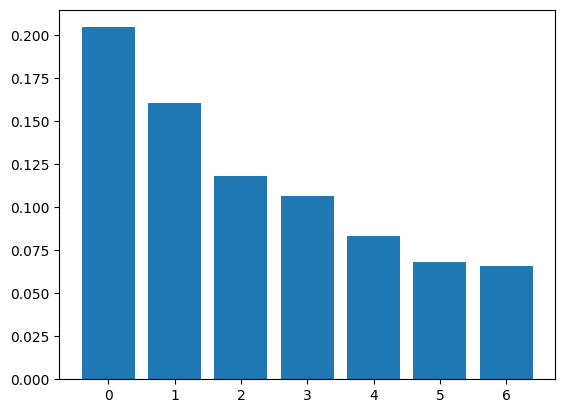

In [436]:
import matplotlib.pyplot as plt
plt.bar(indice, explained_variance)
plt.show()

# XGBoosting

In [437]:
from xgboost import XGBClassifier
clf = XGBClassifier(booster = 'dart')
clf

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [438]:
clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [439]:
y_pred = clf.predict(x_test)

In [440]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.93     10551
           1       0.91      0.93      0.92      2761
           2       0.63      0.93      0.75      1139
           3       0.86      0.92      0.89      1551
           4       0.96      0.98      0.97      1014
           5       0.84      0.96      0.89       768
           6       0.80      0.99      0.89       321
           7       0.54      0.91      0.68        80
           8       0.51      0.88      0.64        66
           9       0.90      1.00      0.95        19

    accuracy                           0.91     18270
   macro avg       0.79      0.94      0.85     18270
weighted avg       0.93      0.91      0.91     18270

